<a href="https://colab.research.google.com/github/BrunoMinetti/Colab/blob/main/DeepLearning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning com Keras
Esse Notebook foi criado visando Estudar a Biblioteca Keras do Google para treinar modelos de Deep Learning utilizando rede neural sequêncial com otimizador Back Propagation.

Modelo desenvolvido durante a aula do Samsung Ocean com o Professor Paulo Salvatore.

Aula Deep Learning: Introdução com Keras e Python, partes 1 e 2.

Aluno: Bruno Cesar Minetti Sanches

## Bibliotecas utilizadas:

In [1]:
### Bibliotecas:
# Importa a biblioteca Keras:
import keras
# Base de Dados MNIST:
from keras.datasets import mnist 
# Arquitetura da nossa rede neural:
from tensorflow.python.keras import Sequential 
# Neurônio (base da rede) e Regularizador (evita overfitting):
from tensorflow.python.keras.layers import Dense, Dropout 
# Otimizador (back propagation):
from tensorflow.compat.v1.keras.optimizers import RMSprop
# Plota modelos gráficos:
import matplotlib.pyplot as plt 
# Traz Funções matemáticas simplificadas:
import numpy as np 

## Carregando o Dataset Mnist do Keras

In [2]:
'''
Carregando os dados de treino e teste, o Keras já traz em sua biblioteca
um banco de imagens para treinar o modelo, sem ter a necessidade de buscar,
ou mesmo ter que criar esse banco, o que é bastante complicado, e parte 
importante para a criação de um bom modelo de machine learning.
'''

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
'''
Após importar os dados, é importante analisar o dataset e veridicar o que temos 
e como ele está estruturado.
'''

print("Quantidade de imagens para treino:", len(x_treino))
print("Quantidade de imagens para teste:", len(x_teste))
print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]
representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 representa:", representacao_primeira_imagem)
print("Formato da primeira imagem:", primeira_imagem.shape,
      type(primeira_imagem.shape))
print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 representa: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242

A imagem representa: 7


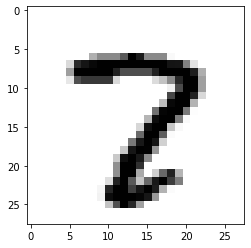

In [4]:
# Visualizando como a imagem é utilizando MatPlotLib:

indice = 12000
print("A imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)

 ## Fluxo para construção de rede neural
- Organizar a camada de entrada (input)
- Organizar a camada de saída (output)
- Estruturar a nossa rede neural
- Treinar o modelo
- Fazer as previsões

## Achatando o Dataset:

In [5]:
'''
Achatando a matriz de pixels e transformando em uma única lista.
Procure evitar criar muitas variáveis duplicadas, isso além de deixar seu
notebook pesado, pode provocar confusão, "nomear suas variáveis com sabedoria,
você deve, pequeno padauan."
'''

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [6]:
# Verificando como seu dataset ficou após o achatamento

print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

# Como ficou x_treino[0]?
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

## Normalizando os Dados:

In [7]:
'''
Normalização dos dados

A ideia é manter os valores do modelo entre zero e um então, o "255" vira 1,
"127" vira 0.5, 0 se mantém, mudando a escala.

Converte toda a base de x_treino de uint_8 para float32, isso é necessário para
atender a critérios da biblioteca. Podemos verificar isso na documentação
técnica do Keras.
'''
x_treino = x_treino.astype('float32') 
x_teste = x_teste.astype('float32') 

'''
Dividimos todos os 60000 valores de x_treino por 255 e armazenamos os resultados
em x_treino novamente, evitando criar novas variáveis inúteis.
'''
x_treino /= 255
'''
E fazemos o mesmo com x_teste dividindo todos os 10000 valores de x_teste por
255 e armazenamos os resultados em x_teste novamente.
'''
x_teste /= 255 

In [8]:
'''
Acessamos a primeira imagem, disponível em x_treino[0], e depois exibimos qual o
valor está no pixel 350 da imagem.
Lembrando que cada linha possui 28 pixels (0-27), portanto ao acessar o índice 
28, estamos acessando o 1º pixel da segunda linha.
'''

print('valor está em x_treino[0] no pixel 350 da imagem:', x_treino[0][350],
      type(x_treino[0][350]))
print(x_treino[0])

valor está em x_treino[0] no pixel 350 da imagem: 0.27450982 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.     

## Preparando a camada de saída do modelo:

Preparação da camada de saída (output):

- Quais são as possibilidades de saída? Números de 0 a 9
- Quantos itens temos? 10 itens
- Números  -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
- Número 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- Número 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- Número 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [9]:
valores_unicos = set(y_treino) # {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10
print(quantidade_valores_unicos)

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Criando o modelo de rede neural sequêncial:

Primeira hidden layer:
-  30 neurônios;
- Função de ativação: ReLU;
- Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada (input), lembrando que esse precisa estar em formato de tupla.

Adicionamos um regularizador (bias) nessa primeira camada, que ajuda a evitar o overfitting. No caso, será o Dropout.

Segunda hidden layer:
- 20 neurônios
- Função de ativação: ReLU

Adicionamos um regularizador para segunda hidden layer.

Finalizamos com a camada de saída (output), informando a quantidade de valores únicos que, no caso, é 10, de 0 a 9.

Função de ativação: Como ReLU deve usada apenas nas hidden layers, pois não performa bem nessa camada de ativação, iremos utilizar a função Softmax.

In [10]:
model = Sequential() # Criando o modelo da rede neural


#Primeira hidden layer:
model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

#Adicionando um regularidor (bias) na primeira camada:
model.add(Dropout(0.2))

# Segunda hidden layer:
model.add(Dense(20, activation='relu'))

# Adicionando o regularizador para a segunda camada:
model.add(Dropout(0.2))

#Adicionando a última camada:
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


## Compilando e treinando o modelo:
Precisamos informar qual será:
- A função de erro;
- O algoritmo de backpropagation, importado junto com as bibliotecas;
- Os Dados para Treino (imagens normalizadas e labels categorizadas);
- Os Dados para Teste (imagens normalizadas e labels categorizadas);
- A quantidade de épocas que queremos rodar (sendo 1 época equivalente a analisar TODAS as imagens de treino);
- O Tamanho de cada 'batch':
> Supondo que temos 100 imagens, pode ser muito pesado para processar de uma única vez, portanto, quebramos em 'batches' de 10 imagens, cada, e processamos 10 imagens por vez, geralmente, o tamanho dos batches deve ser potência de 2 (2, 4, 8, 16, 32, 64, 128, ...), para melhorar performance.

In [11]:
# Compilamos o modelo:

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Treinamos o modelo (verbose serve para vizualizar o treinamento):

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.2531 - accuracy: 0.5870 - val_loss: 0.3122 - val_accuracy: 0.9128
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5176 - accuracy: 0.8418 - val_loss: 0.2525 - val_accuracy: 0.9256
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4156 - accuracy: 0.8737 - val_loss: 0.2212 - val_accuracy: 0.9352
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.8897 - val_loss: 0.2024 - val_accuracy: 0.9403
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8966 - val_loss: 0.1912 - val_accuracy: 0.9440
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.9034 - val_loss: 0.1808 - val_accuracy: 0.9480
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.9084 - val_loss: 0.1776 - val_accuracy: 0.9484
Epoch 

## Lendo imagens de teste:

Como o model.predict aceita mais de uma imagem ao mesmo tempo e queremos apenas analisar uma imagem, precisamos fazer um reshape, em que [0, 0, 0, 0], vira [[0, 0, 0, 0]]

Fazemos a previsão da imagem, porém o retorno é de uma série, que fica difícil de ler, contudo o valor mais provável da imagem será o mais alto, ou o que se aproxima mais de 1, lembrando que os valores estão normalizados.

Transformamos então a previsão em algo que conseguimos entender de forma mais fácil, utilizando o Numpy. Convertemos a previsão que está em porcentagens, pegando o maior valor disponível da lista.

Recarregamos o MNIST e exibimos a imagem original usando o matplotlib carregado anteriormente para comparar se o número foi lido corretamente pelo modelo.

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão: [[1.68704182e-01 5.26821781e-11 1.20880827e-03 2.04211597e-06
  8.93023480e-06 3.48912142e-02 7.93975174e-01 1.98096051e-09
  1.19932985e-03 1.03737075e-05]]
Previsão ajustada: [6]


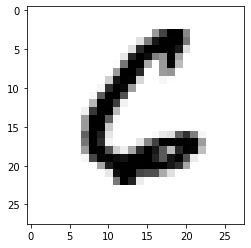

In [12]:
'''
O índice serve para alterarmos a imagem de teste que queremos ler com o modelo.
'''
indice = 7503

print("Valor categórico em y_teste[indice]:", y_teste[indice])

# Reshape da imagem:
imagem = x_teste[indice].reshape((1, resolucao_total))

# Fazemos a previsão da imagem:
prediction = model.predict(imagem)
print("Previsão:", prediction)

# Transformando a previsão em algo mais fácil de entender:
prediction_class = np.argmax(prediction, axis=-1)
print("Previsão ajustada:", prediction_class)

'''
Recarregamos o MNIST e exibimos a imagem original usando o matplotlib carregado 
anteriormente, lembrando que durante :
'''
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary);